<a href="https://colab.research.google.com/github/pradyumna4998/Intro-to-ML/blob/main/Intro_to_ML_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Machine Learning

Homework 6

Name: V.pradyumna

Student ID : 801345963

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from sklearn.metrics import classification_report

In [ ]:
url ='https://raw.githubusercontent.com/pradyumna4998/Intro-to-ML/main/Housing.csv'
dataFrames = pd.read_csv(url)
dataFrames.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
dataFrames['furnishingstatus'].value_counts().unique
dataFrames.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
dataFrames = pd.get_dummies(dataFrames, columns=['furnishingstatus'], drop_first=False)
dataFrames = dataFrames.drop('furnishingstatus_semi-furnished', axis=1)
dataFrames.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,1,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,0,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,1,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,1,0


In [ ]:
binary_columns = dataFrames.select_dtypes(include=['object']).columns
binary_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [ ]:
dataFrames[binary_columns] = dataFrames[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))
dataFrames.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


In [ ]:
dataFrames.shape

(545, 14)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_scaled = MinMaxScaler()
y_scaled = MinMaxScaler()

In [ ]:
X = dataFrames.drop('price', axis = 1)
y = dataFrames[['price']]

In [ ]:
X = pd.DataFrame(x_scaled.fit_transform(X), columns=X.columns, index=X.index).values
y = pd.DataFrame(y_scaled.fit_transform(y), columns=y.columns, index=y.index).values

In [ ]:
X_training, X_testing, Y_training, Y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
training_X = torch.tensor(X_training)
training_y =  torch.tensor(Y_training)
testing_X =  torch.tensor(X_testing)
testing_y=  torch.tensor(Y_testing)

In [ ]:
dataTraining = TensorDataset(training_X, training_y)
loading_trainSet = DataLoader(dataTraining, batch_size=32, shuffle=True)

In [ ]:
dataTesting = TensorDataset(testing_X, testing_y)
loading_testSet = DataLoader(dataTesting, batch_size=32)

In [ ]:
def model_train(model, criterion, optimizer, epochs, loading_trainSet, testing_X, testing_y):
    training_Loss = []
    testing_Loss = []
    for epoch in range(epochs + 1):
        # Training
        model.train()
        for inputs, targets in loading_trainSet:
            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, targets)
            loss.backward()
            optimizer.step()
        # Validation
        model.eval()
        with torch.no_grad():
            output_test = model(testing_X)
            testing_loss = criterion(output_test, testing_y)
            if epoch % 500 == 0:
              print(f'Epoch {epoch}/{epochs}, Training Loss: {loss.item()}, Testing Loss: {testing_loss.item()}')
              testing_Loss.append(testing_loss)
              training_Loss.append(loss)
    return training_Loss, testing_Loss

Problem:1)A

In [ ]:
# Model 1
modelFirst = nn.Sequential(nn.Linear(training_X.shape[1], 32),nn.Tanh(),nn.Linear(32, 1)).to(torch.float64)
optimizerFirst = optim.SGD(modelFirst.parameters(), lr=0.02)
training_loss, testing_loss = model_train(modelFirst, nn.MSELoss(), optimizerFirst, 5000, loading_trainSet, testing_X, testing_y)

Epoch 0/5000, Training Loss: 0.01712257228880188, Testing Loss: 0.042327766656289685
Epoch 500/5000, Training Loss: 0.0050117547806131915, Testing Loss: 0.013205343653145657
Epoch 1000/5000, Training Loss: 0.008346930914050149, Testing Loss: 0.013220898442566917
Epoch 1500/5000, Training Loss: 0.005725685531291362, Testing Loss: 0.013389297461568125
Epoch 2000/5000, Training Loss: 0.003418119939921166, Testing Loss: 0.013096622964831823
Epoch 2500/5000, Training Loss: 0.0048418542181646994, Testing Loss: 0.013274659852418465
Epoch 3000/5000, Training Loss: 0.006943797474779884, Testing Loss: 0.013159316061528988
Epoch 3500/5000, Training Loss: 0.005845645454744049, Testing Loss: 0.013620824860706244
Epoch 4000/5000, Training Loss: 0.005528219526809766, Testing Loss: 0.013405194916417838
Epoch 4500/5000, Training Loss: 0.008361273831123454, Testing Loss: 0.013458284921138266
Epoch 5000/5000, Training Loss: 0.0021617377180102484, Testing Loss: 0.013760948298418835


In [ ]:
for name, param in modelFirst.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Parameter name: 0.weight, Shape: torch.Size([32, 13])
Parameter name: 0.bias, Shape: torch.Size([32])
Parameter name: 2.weight, Shape: torch.Size([1, 32])
Parameter name: 2.bias, Shape: torch.Size([1])


In [ ]:
total_no_of_parameters = sum(p.numel() for p in modelFirst.parameters() if p.requires_grad)
print("Total number of parameters that is trained ", total_no_of_parameters,  '\n')

Total number of parameters that is trained  481 



In [ ]:
epochs = range(0, 5001, 500)

<ipython-input-19-90261889885b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


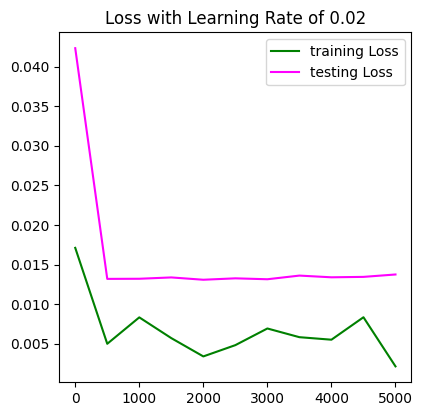

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Loss for optimizer - SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in training_loss]), color='green', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in testing_loss]), color='magenta', label = 'testing Loss')
plt.title('Loss with Learning Rate of 0.02')
plt.legend()

plt.show()

Problem:1)b

In [ ]:
modelSec = nn.Sequential(nn.Linear(training_X.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 64),# Second hidden layer with 64 neurons
    nn.Tanh(),
    nn.Linear(64, 16), # Third hidden layer with 16 neurons
    nn.Tanh(),
    nn.Linear(16, 1) # Output layer with 1 neuron
).to(torch.float64)
criteria = nn.MSELoss()
optimizerSec = optim.SGD(modelSec.parameters(), lr=0.02)
training_lossSec, testing_lossSec = model_train(modelSec, nn.MSELoss(), optimizerSec, 5000, loading_trainSet, testing_X, testing_y)

Epoch 0/5000, Training Loss: 0.030584940087731494, Testing Loss: 0.04189088718784682
Epoch 500/5000, Training Loss: 0.01367502639738534, Testing Loss: 0.013164546172538438
Epoch 1000/5000, Training Loss: 0.005520714372276683, Testing Loss: 0.0131326484872513
Epoch 1500/5000, Training Loss: 0.0039994443665933395, Testing Loss: 0.013239504803569824
Epoch 2000/5000, Training Loss: 0.010352629974759237, Testing Loss: 0.012986632029778454
Epoch 2500/5000, Training Loss: 0.017336689762958872, Testing Loss: 0.012874119593696552
Epoch 3000/5000, Training Loss: 0.005363056540732705, Testing Loss: 0.013237988432863319
Epoch 3500/5000, Training Loss: 0.01150116124210378, Testing Loss: 0.012897193980578378
Epoch 4000/5000, Training Loss: 0.010200137474473842, Testing Loss: 0.01310576022544024
Epoch 4500/5000, Training Loss: 0.004867530277036013, Testing Loss: 0.013067185600428834
Epoch 5000/5000, Training Loss: 0.0066149182537743375, Testing Loss: 0.013429276909375423


In [ ]:
for name, param in modelSec.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Parameter name: 0.weight, Shape: torch.Size([32, 13])
Parameter name: 0.bias, Shape: torch.Size([32])
Parameter name: 2.weight, Shape: torch.Size([64, 32])
Parameter name: 2.bias, Shape: torch.Size([64])
Parameter name: 4.weight, Shape: torch.Size([16, 64])
Parameter name: 4.bias, Shape: torch.Size([16])
Parameter name: 6.weight, Shape: torch.Size([1, 16])
Parameter name: 6.bias, Shape: torch.Size([1])


In [ ]:
total_no_of_parameters= sum(p.numel() for p in modelSec.parameters() if p.requires_grad)
print("Total number of parameters that is trained ", total_no_of_parameters,  '\n')

Total number of parameters that is trained  3617 



<ipython-input-23-03913a257f10>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


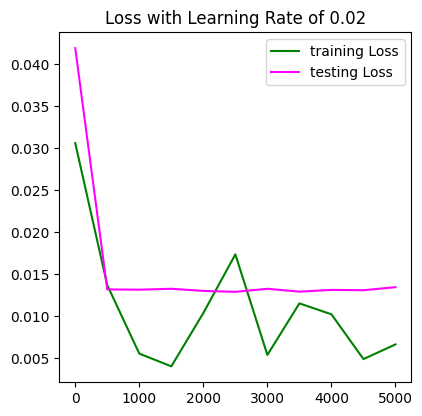

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Loss for optimizer - SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in training_lossSec]), color='green', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in testing_lossSec]), color='magenta', label = 'testing Loss')
plt.title('Loss with Learning Rate of 0.02')
plt.legend()

plt.show()


Problem:2

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.1 MB/s eta 0:00:00
time: 240 µs (started: 2023-12-02 02:08:13 +00:00)


In [ ]:
from torchvision import datasets, transforms
from sklearn.metrics import classification_report

time: 474 µs (started: 2023-12-02 02:08:16 +00:00)


In [ ]:
torch.manual_seed(123)

time: 7.06 ms (started: 2023-12-02 02:08:18 +00:00)


In [ ]:
datasets_training = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Calculate mean and std
images = torch.stack([img_t for img_t, _ in datasets_training], dim=3)
mean = images.view(3, -1).mean(dim=1)
standard = images.view(3, -1).std(dim=1)

100%|██████████| 170498071/170498071 [00:03<00:00, 47031803.86it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
time: 21.1 s (started: 2023-12-02 02:08:21 +00:00)


In [ ]:
mean

tensor([0.4914, 0.4822, 0.4465])

time: 15.7 ms (started: 2023-12-02 02:08:46 +00:00)


In [ ]:
standard

tensor([0.2470, 0.2435, 0.2616])

time: 3.98 ms (started: 2023-12-02 02:08:55 +00:00)


In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

time: 450 µs (started: 2023-12-02 02:09:02 +00:00)


In [ ]:
device

device(type='cpu')

time: 2.28 ms (started: 2023-12-02 02:09:05 +00:00)


In [ ]:
# Define transformation with calculated mean and std
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                             (0.2470, 0.2435, 0.2616))
])

time: 513 µs (started: 2023-12-02 02:10:16 +00:00)


In [ ]:
cifar10 = datasets.CIFAR10(
    './data', train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465),
                             (0.2470, 0.2435, 0.2616))
    ]))


time: 386 ms (started: 2023-12-02 02:10:34 +00:00)


In [ ]:
cifar10_test = datasets.CIFAR10(
     './data', train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465),
                             (0.2470, 0.2435, 0.2616))
    ]))

time: 321 ms (started: 2023-12-02 02:11:09 +00:00)


In [ ]:
first_image, label = cifar10[0]
print(first_image.shape)

torch.Size([3, 32, 32])
time: 5.54 ms (started: 2023-12-02 02:11:17 +00:00)


In [ ]:
loading_training = DataLoader(cifar10, batch_size=32, shuffle=True, num_workers=2)
loading_testing = DataLoader(cifar10_test, batch_size=32, shuffle=False, num_workers=2)

time: 939 µs (started: 2023-12-02 02:11:39 +00:00)


In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32 * 32 * 3, 512),
    nn.Tanh(),
    nn.Linear(512, 10)
).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

time: 12.7 ms (started: 2023-12-02 02:12:15 +00:00)


In [ ]:
def train_model(model, train_loader, test_loader, num_epochs=300, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Testing the model
        model.eval()
        correct = 0
        total = 0
        all_predicted = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                all_predicted.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        accuracy = correct / total

        if epoch % 1 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Test Accuracy: {accuracy * 100:.2f}%')

    # Classification Report
    report = classification_report(all_labels, all_predicted)
    print("Classification Report:\n", report)


time: 1.69 ms (started: 2023-12-02 02:12:22 +00:00)


In [ ]:
train_model(model, loading_training, loading_testing, num_epochs=300, lr=0.01)

Epoch 1/300, Loss: 1.7886348081870638, Test Accuracy: 40.94%
Epoch 2/300, Loss: 1.6521172705020037, Test Accuracy: 43.15%
Epoch 3/300, Loss: 1.5804378465437692, Test Accuracy: 44.45%
Epoch 4/300, Loss: 1.5198366514246813, Test Accuracy: 45.26%
Epoch 5/300, Loss: 1.4625313013544161, Test Accuracy: 46.44%
Epoch 6/300, Loss: 1.4085316710646, Test Accuracy: 47.50%
Epoch 7/300, Loss: 1.3539841107580803, Test Accuracy: 47.11%
Epoch 8/300, Loss: 1.3031534532744078, Test Accuracy: 47.23%
Epoch 9/300, Loss: 1.249340126015632, Test Accuracy: 48.36%
Epoch 10/300, Loss: 1.1990976107097633, Test Accuracy: 47.90%
Epoch 11/300, Loss: 1.147438968516891, Test Accuracy: 48.39%
Epoch 12/300, Loss: 1.0958708692496966, Test Accuracy: 49.10%
Epoch 13/300, Loss: 1.0460041413990564, Test Accuracy: 48.73%
Epoch 14/300, Loss: 0.9943198018247931, Test Accuracy: 48.12%
Epoch 15/300, Loss: 0.9466876947223873, Test Accuracy: 48.06%
Epoch 16/300, Loss: 0.8974496146195681, Test Accuracy: 48.03%
Epoch 17/300, Loss: 0.

In [ ]:
modelSec = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32 * 32 * 3, 512),
    nn.Tanh(),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Linear(256, 128),
    nn.Tanh(),
    nn.Linear(128, 10)
).to(device)

time: 58.5 ms (started: 2023-12-02 02:14:10 +00:00)


In [ ]:
train_model(modelSec, loading_training, loading_testing, num_epochs=300, lr=0.01)

Epoch 1/300, Loss: 1.8558977566235202, Test Accuracy: 39.43%
Epoch 2/300, Loss: 1.6909837288804643, Test Accuracy: 42.14%
Epoch 3/300, Loss: 1.621885720309125, Test Accuracy: 43.75%
Epoch 4/300, Loss: 1.5618204908041486, Test Accuracy: 44.91%
Epoch 5/300, Loss: 1.5054552575677005, Test Accuracy: 46.76%
Epoch 6/300, Loss: 1.4500889904363294, Test Accuracy: 47.10%
Epoch 7/300, Loss: 1.3931768293267859, Test Accuracy: 47.31%
Epoch 8/300, Loss: 1.3339760422859144, Test Accuracy: 48.21%
Epoch 9/300, Loss: 1.279147292624966, Test Accuracy: 48.66%
Epoch 10/300, Loss: 1.2184554935264342, Test Accuracy: 45.77%
Epoch 11/300, Loss: 1.1620719443127199, Test Accuracy: 49.33%
Epoch 12/300, Loss: 1.1007236039798685, Test Accuracy: 47.62%
Epoch 13/300, Loss: 1.0397566733113177, Test Accuracy: 49.01%
Epoch 14/300, Loss: 0.9810770716868527, Test Accuracy: 47.54%
Epoch 15/300, Loss: 0.9163348599076653, Test Accuracy: 47.37%
Epoch 16/300, Loss: 0.85491862073207, Test Accuracy: 45.07%
Epoch 17/300, Loss: 0

In [ ]:
total_no_of_parameters = sum(p.numel() for p in modelSec.parameters() if p.requires_grad)
print("Total number of trainable parameters ", total_no_of_parameters,  '\n')

Total number of trainable parameters  1738890 

time: 2.86 ms (started: 2023-12-02 04:29:23 +00:00)
